In [1]:
from EasyModel.models import EasyClassifiers
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
models = EasyClassifiers('models.json', 'gridsearchcv.json')
df = pd.read_csv("Social_Network_ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first = True)

In [4]:
X = df.iloc[:,1:4]
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
#models.build_models()
#models.set_data(X_train, X_test, y_train, y_test)
#models.fit_all()

In [6]:
models.run(X_train, X_test, y_train, y_test)

building models
--------------------LogisticRegression--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)
--------------------SVC--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_j

In [7]:
models.classification_reports()

--------------------LogisticRegression--------------------
             precision    recall  f1-score   support

          0       0.80      0.99      0.88        80
          1       0.97      0.62      0.75        52

avg / total       0.87      0.84      0.83       132

--------------------SVC--------------------
             precision    recall  f1-score   support

          0       0.62      0.96      0.75        80
          1       0.57      0.08      0.14        52

avg / total       0.60      0.61      0.51       132

--------------------RandomForestClassifier--------------------
             precision    recall  f1-score   support

          0       0.94      0.93      0.93        80
          1       0.89      0.90      0.90        52

avg / total       0.92      0.92      0.92       132

--------------------KNeighborsClassifier--------------------
             precision    recall  f1-score   support

          0       0.74      0.96      0.84        80
          1       0.8

C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
models.score_reports()

LogisticRegression: 0.9142875067020785
SVC: 0.7719298245614036
RandomForestClassifier: 0.9355655151560494
KNeighborsClassifier: 0.8463965417274528
GaussianNB: 0.9359598467561941
AdaBoostClassifier: 0.9247480486040973
XGBClassifier: 0.9459575555804935


In [9]:
models.feature_inspect()

--------------------LogisticRegression--------------------
       coef         variable   abscoef
1  0.141736              Age  0.141736
2  0.000026  EstimatedSalary  0.000026
0  0.000000           Gender  0.000000
--------------------SVC--------------------
SVC does not support feature coefficient or importance
--------------------RandomForestClassifier--------------------
           feature  importance
1              Age    0.519697
2  EstimatedSalary    0.466864
0           Gender    0.013439
--------------------KNeighborsClassifier--------------------
KNeighborsClassifier does not support feature coefficient or importance
--------------------GaussianNB--------------------
GaussianNB does not support feature coefficient or importance
--------------------AdaBoostClassifier--------------------
           feature  importance
2  EstimatedSalary    0.503164
1              Age    0.468086
0           Gender    0.028750
--------------------XGBClassifier--------------------
           featu

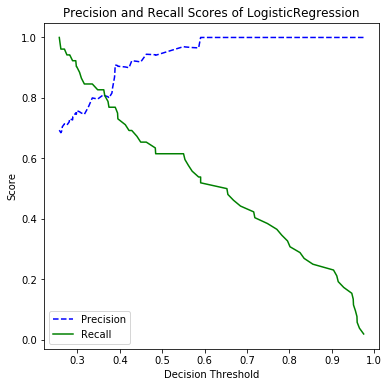

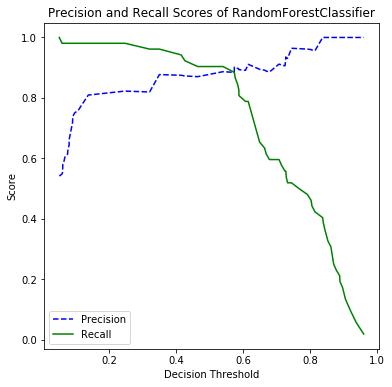

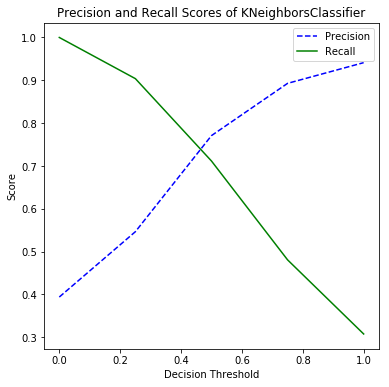

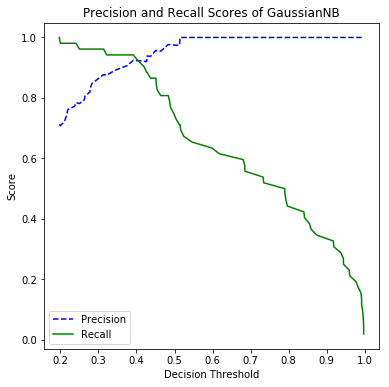

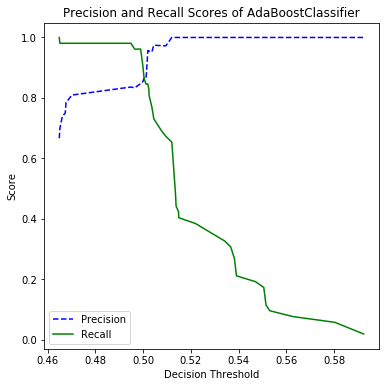

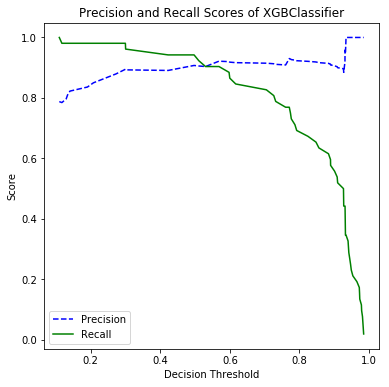

In [10]:
models.decision_threshold()